# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
# !pip install tensorflow==2.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [ ]:
# Load the training dataset
instagram_df_train=pd.read_csv('insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
# Load the testing data
instagram_df_test=pd.read_csv('insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


MINI CHALLENGE #1:
- Print the first and last 5 rows in both the training and testing DataFrames


In [ ]:
display(instagram_df_train.head())
display(instagram_df_train.tail())
display(instagram_df_test.head())
display(instagram_df_test.tail())

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
# Checking if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [ ]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

MINI CHALLENGE #2:
- Perform exploratory data analysis on the testing dataset

In [ ]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [ ]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_test['fake'].value_counts()

1    60
0    60
Name: fake, dtype: int64

# TASK #4: PERFORM DATA VISUALIZATION

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


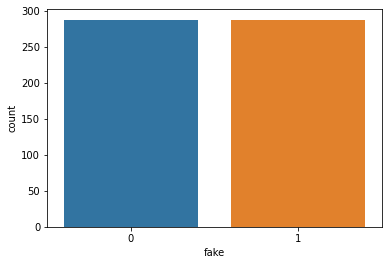

In [ ]:
# Visualize the data
sns.countplot(instagram_df_train['fake'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


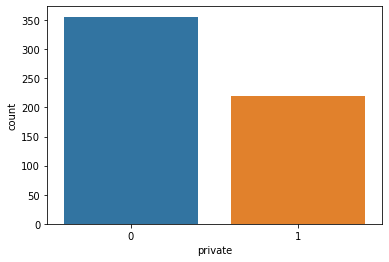

In [ ]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


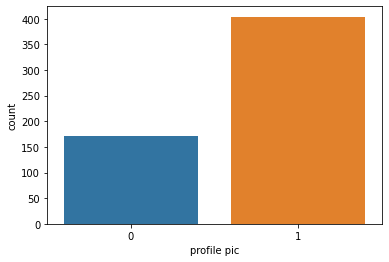

In [ ]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


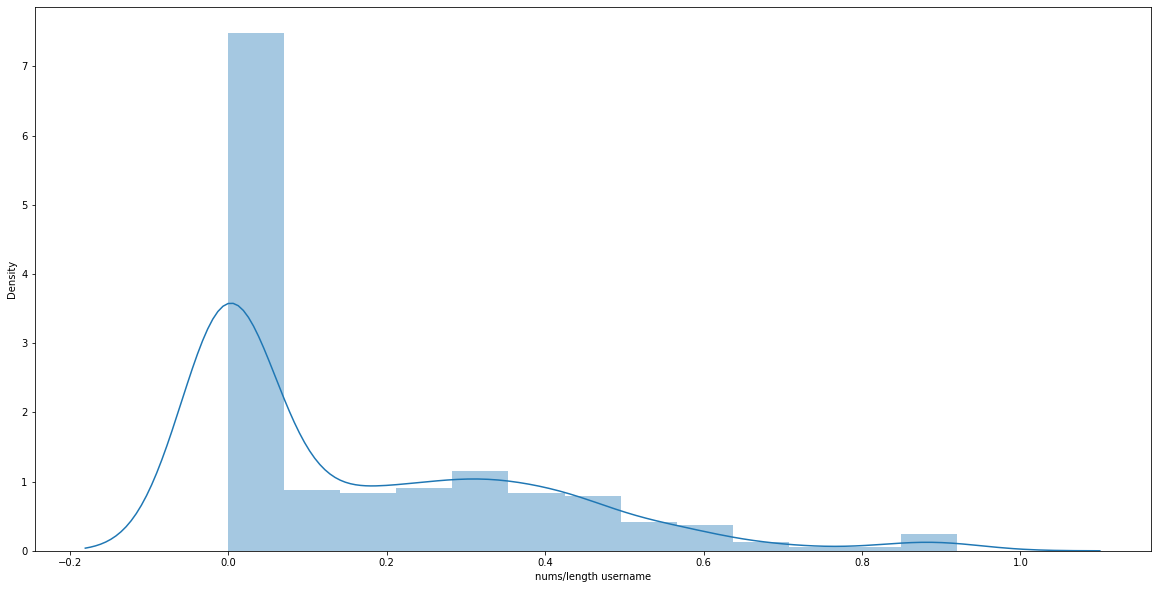

In [ ]:
# Visualize the data
plt.figure(figsize = (20, 10)) 
sns.distplot(instagram_df_train['nums/length username'])

<Figure size 1440x1440 with 0 Axes>

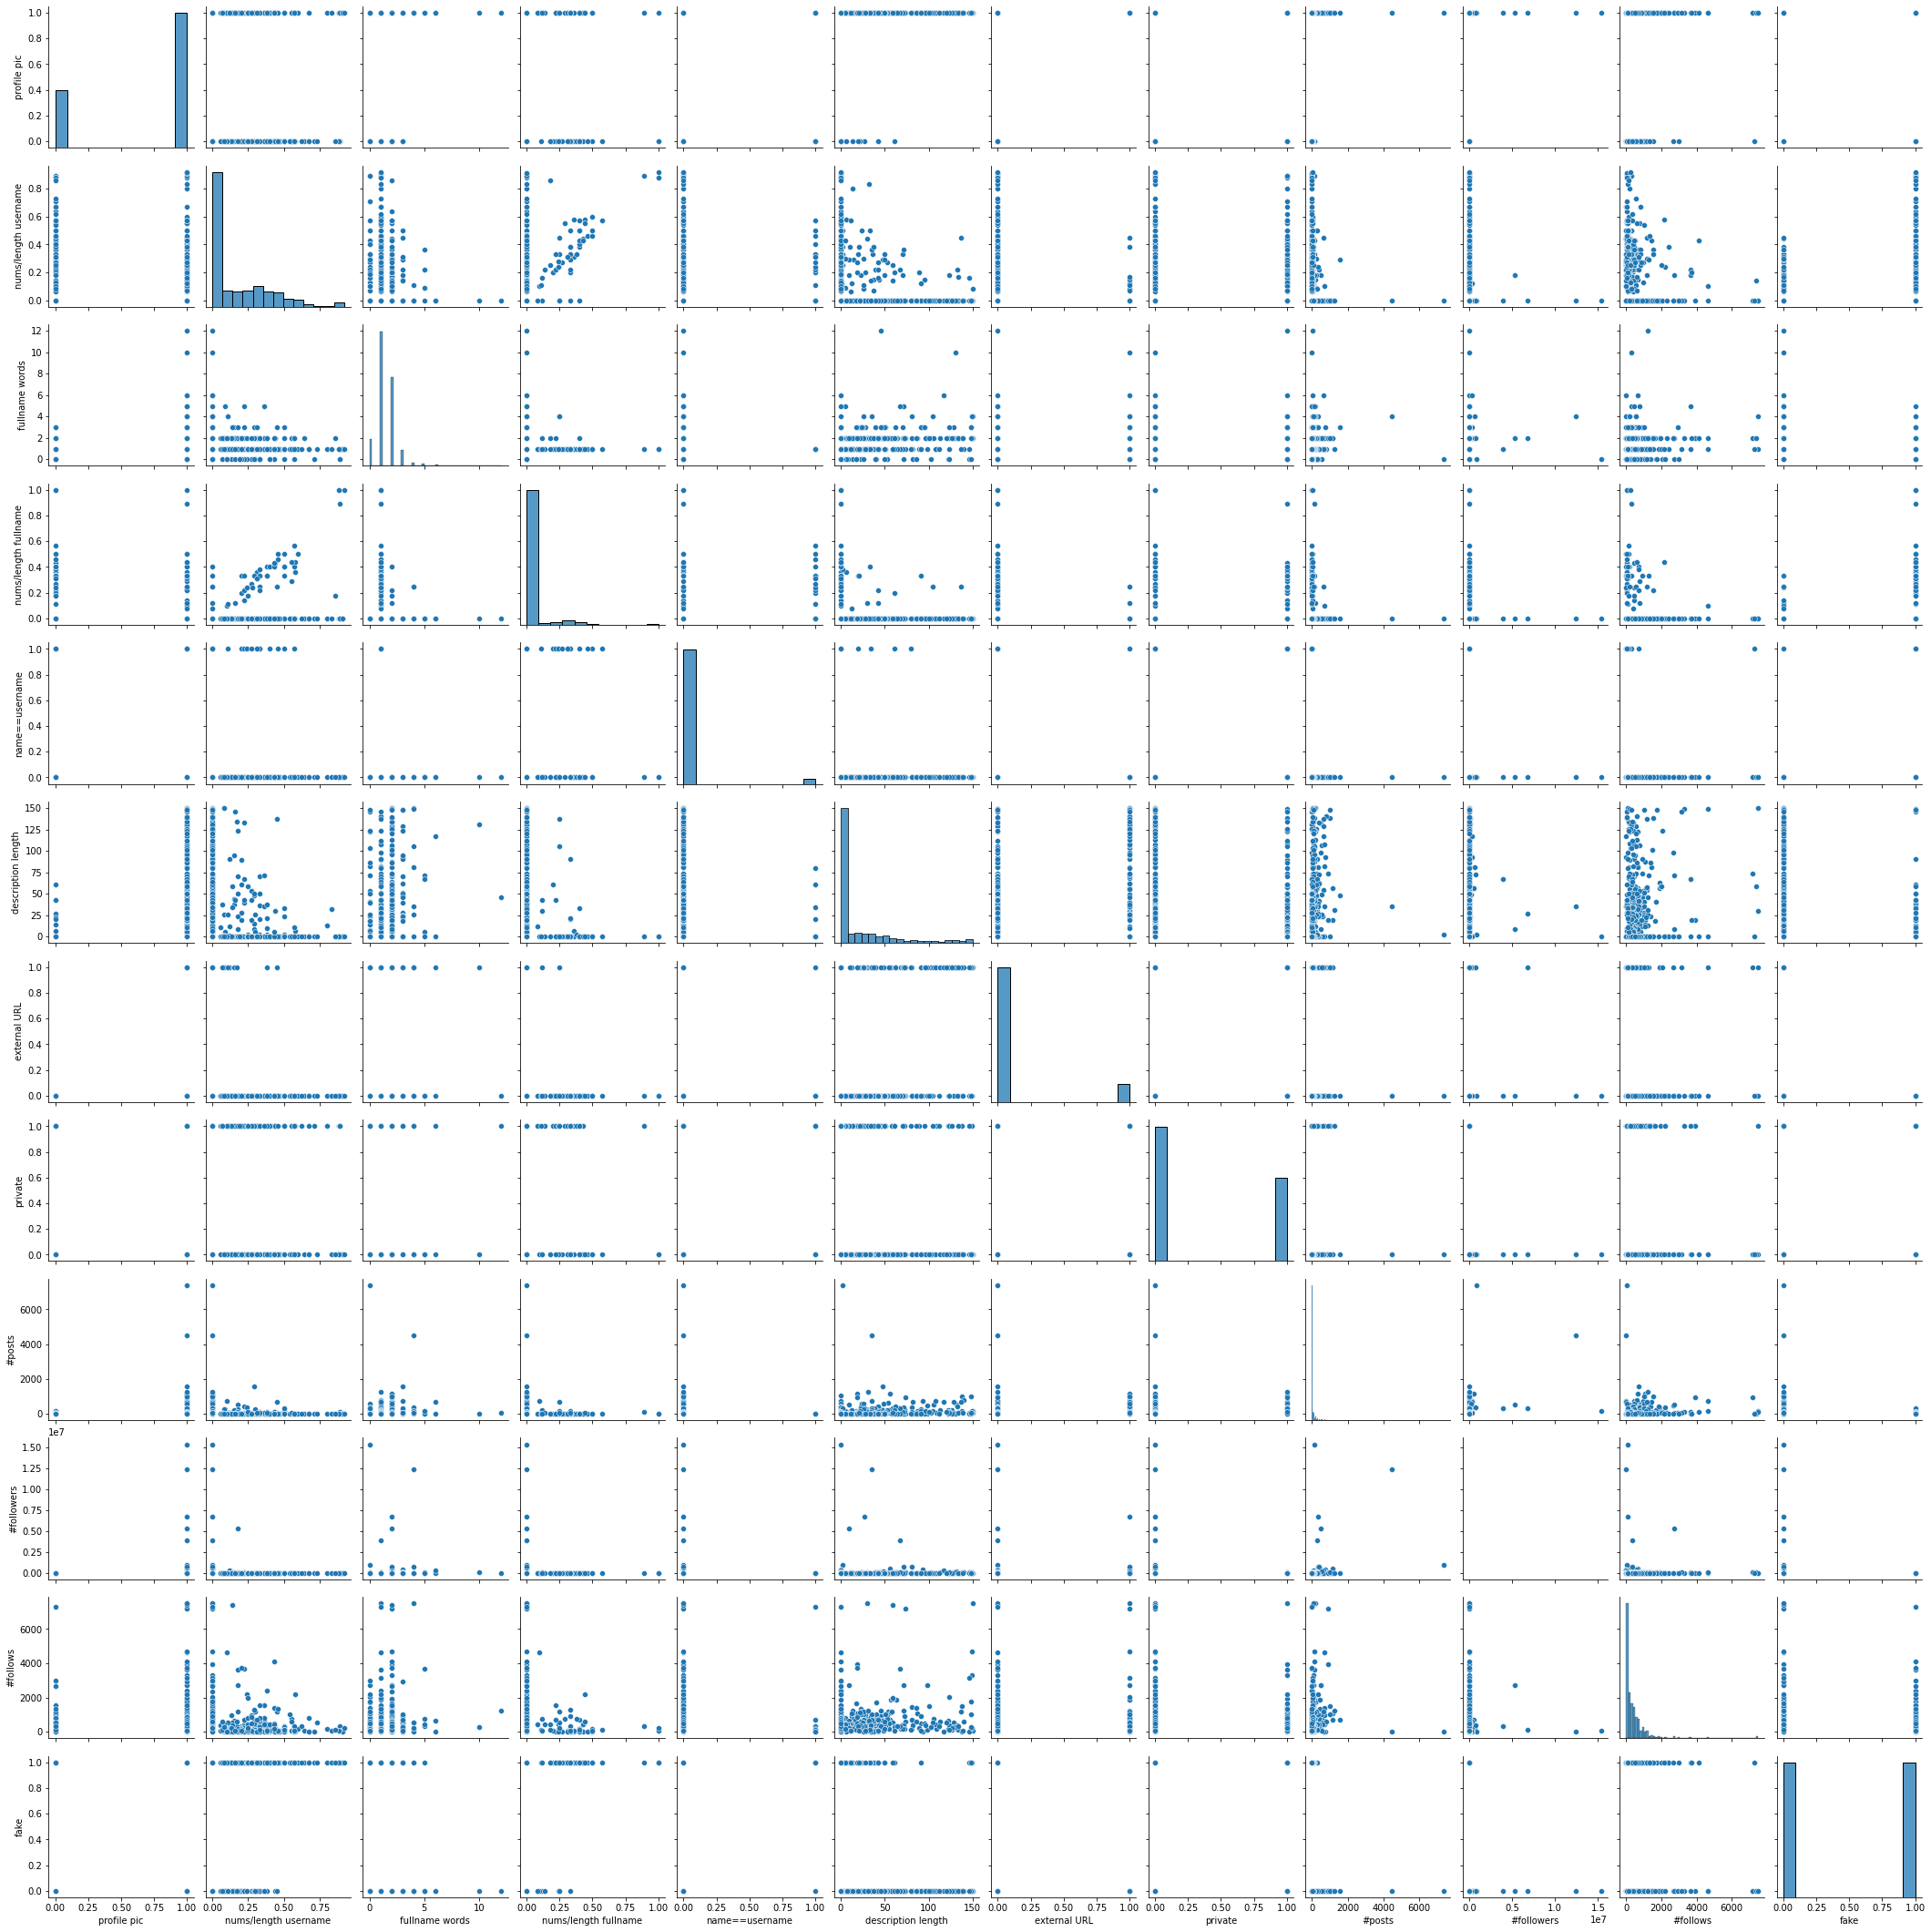

In [ ]:
# Plot pairplot
plt.figure(figsize = (20, 20))
sns.pairplot(instagram_df_train)


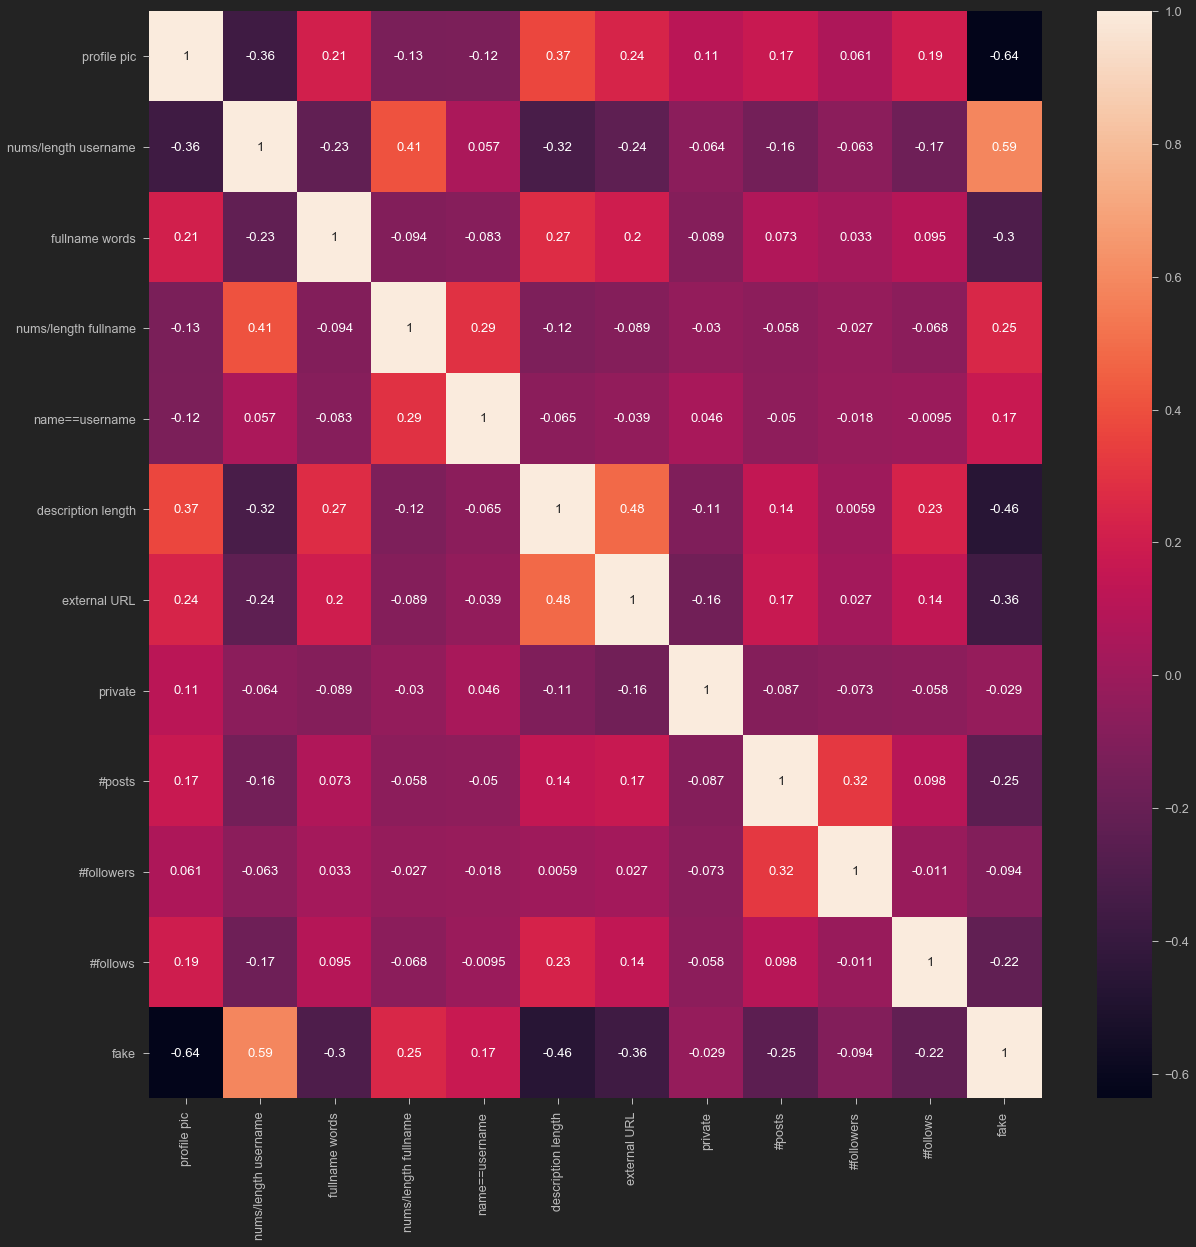

In [ ]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot() 
sns.heatmap(cm, annot = True, ax = ax)

MINI CHALLENGE #3:
- Plot the count plot for 'fake', 'profile pic' and 'private' testing dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


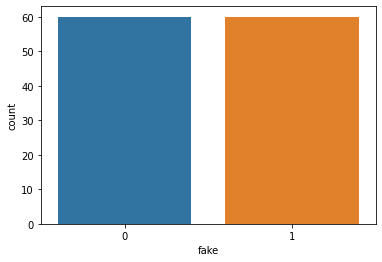

In [ ]:
sns.countplot(instagram_df_test['fake'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


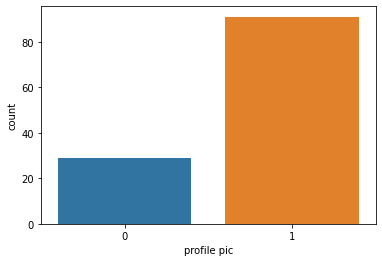

In [ ]:
sns.countplot(instagram_df_test['profile pic'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


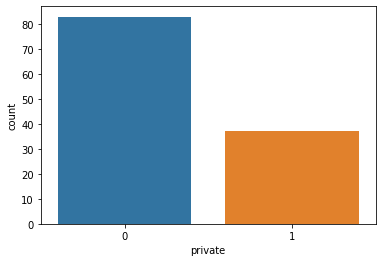

In [ ]:
sns.countplot(instagram_df_test['private'])

# TASK #5: PREPARE THE DATA TO FEED THE MODEL

In [ ]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [ ]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

MINI CHALLENGE #4:
- Print out the shapes of the training and testing datasets
- What is the % of the training and testing data?

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [ ]:
Training_data=len(X_train)/(len(X_train)+len(X_test))
Training_data

0.8275862068965517

In [ ]:
Test_data=len(X_test)/(len(X_train)+len(X_test))
Test_data

0.1724137931034483

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETS

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHING NEURAL NETWORKS TRAINING

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

- “Backpropagation neural networks: A tutorial” by Barry J.Wythoff
- “Improved backpropagation learning in neural networks with windowed momentum”, International Journal of Neural Systems, vol. 12, no.3&4, pp. 303-318. 

# TASK #8: BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 31,202
Trainable params: 31,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 1s 30ms/step - loss: 0.6130 - accuracy: 0.6822 - val_loss: 0.3476 - val_accuracy: 0.8966
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2860 - accuracy: 0.9122 - val_loss: 0.2088 - val_accuracy: 0.9138
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9253 - val_loss: 0.1031 - val_accuracy: 0.9483
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.8900 - val_loss: 0.1546 - val_accuracy: 0.9310
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.1989 - accuracy: 0.9212 - val_loss: 0.2029 - val_accuracy: 0.9138
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2070 - accuracy: 0.9232 - val_loss: 0.1200 - val_accuracy: 0.9483
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.8941 - val_loss: 0.2222 - val_accuracy: 0.9138
Epoch 8/20
17/17 [=

MINI CHALLENGE #5:
- Add a new hidden layer with 25 neurons and 'relu' activation function
- Print out the model summary and inicate how many trainable parameters

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                600       
_________________________________________________________________
dense_10 (Dense)             (None, 150)               7650      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_12 (Dense)             (None, 25)                3775      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 1s 15ms/step - loss: 0.6286 - accuracy: 0.6922 - val_loss: 0.4958 - val_accuracy: 0.8793
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8563 - val_loss: 0.3104 - val_accuracy: 0.8966
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8913 - val_loss: 0.2431 - val_accuracy: 0.8966
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.9281 - val_loss: 0.1654 - val_accuracy: 0.9483
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.8948 - val_loss: 0.1678 - val_accuracy: 0.9310
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2377 - accuracy: 0.9079 - val_loss: 0.1489 - val_accuracy: 0.9310
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2720 - accuracy: 0.9034 - val_loss: 0.1915 - val_accuracy: 0.9138
Epoch 8/20
17/17 [=

# TASK #9: ASSESS THE PERORMANCE OF TRAINED MODEL

![image.png](attachment:image.png)

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


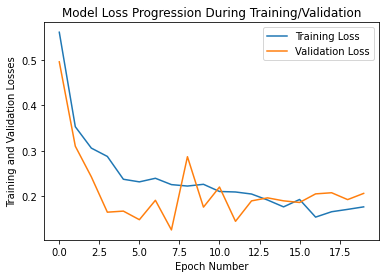

In [ ]:
plt.plot(epochs_hist.history['loss']) #loss of training data
plt.plot(epochs_hist.history['val_loss']) # loss of validation data(test data)

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i)) #np.argmax(a) returns the index of the maxiumum value of a
    
for i in y_test:
    test.append(np.argmax(i))

In [ ]:
predicted 

array([[6.42714731e-05, 9.99935746e-01],
       [9.99198496e-01, 8.01544636e-04],
       [9.99164462e-01, 8.35539948e-04],
       [9.85216498e-01, 1.47834700e-02],
       [1.05785519e-01, 8.94214451e-01],
       [9.17458951e-01, 8.25410932e-02],
       [7.30811536e-01, 2.69188434e-01],
       [9.88765776e-01, 1.12342117e-02],
       [9.75641549e-01, 2.43584067e-02],
       [9.30325866e-01, 6.96741492e-02],
       [9.37287629e-01, 6.27123192e-02],
       [9.99970317e-01, 2.96700291e-05],
       [9.82493043e-01, 1.75069571e-02],
       [7.58243859e-01, 2.41756141e-01],
       [9.83515799e-01, 1.64841618e-02],
       [9.93563950e-01, 6.43597962e-03],
       [9.12316620e-01, 8.76834095e-02],
       [9.82835233e-01, 1.71647016e-02],
       [9.99935031e-01, 6.50176298e-05],
       [9.98085260e-01, 1.91474147e-03],
       [2.68033557e-02, 9.73196685e-01],
       [8.77253890e-01, 1.22746080e-01],
       [9.68778551e-01, 3.12214158e-02],
       [9.90697682e-01, 9.30229295e-03],
       [9.551969

In [ ]:
predicted_value

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.91      0.88      0.90        60

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



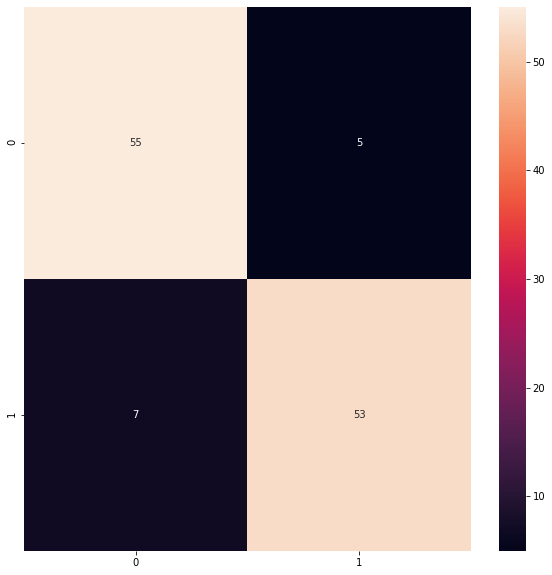

In [ ]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)

MINI CHALLENGE #6:
- Retrain the model for more epochs (30) and reassess model performance. Comment on the results.

# CONGRATULATIONS ON FINISHING THE PROJECT!

MINI CHALLENGE #1 SOLUTION :
- Print the first and last 5 rows in both training and testing DataFrames

In [ ]:
instagram_df_train.head()

In [ ]:
instagram_df_train.tail()

In [ ]:
instagram_df_test.head()

In [ ]:
instagram_df_test.tail()

MINI CHALLENGE #2 SOLUTION:
- Perform exploratory data analysis on the testing dataset

In [ ]:
# Getting dataframe info
instagram_df_test.info()
# Get the statistical summary of the dataframe
instagram_df_test.describe()
# Checking null values
instagram_df_test.isnull().sum()
# Get the number of unique values in the profile pic
instagram_df_test['profile pic'].value_counts()
# Get the number of unique values
instagram_df_test['fake'].value_counts()

MINI CHALLENGE #3 SOLUTION:
- Plot the count plot for 'fake', 'profile pic' and 'private' testing dataset

In [ ]:
sns.countplot(instagram_df_test['fake'])

sns.countplot(instagram_df_test['private'])

sns.countplot(instagram_df_test['profile pic'])

MINI CHALLENGE #4 SOLUTION:
- Print out the shapes of the training and testing datasets
- What is the % of the training and testing data?


In [ ]:
# print the shapes of training and testing datasets 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100
Training_data

In [ ]:
Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100
Testing_data

MINI CHALLENGE #5 SOLUTION:
- Add a new hidden layer with 25 neurons and 'relu' activation function
- Print out the model summary and inicate how many trainable parameters


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

# Trainable params: 12,727

MINI CHALLENGE #6 SOLUTION:
- Retrain the model for more epochs (~30) and reassess model performance

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 30,  verbose = 1, validation_split = 0.1)